# 2 Machine Learning for Regression

In [206]:
import numpy as np
import pandas as pd

### 2.2 Data Preperation

In [207]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv"

In [208]:
# !wget $data

In [209]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [210]:
# normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [211]:
# find the string columns
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [212]:
# object are the string columns for this data set
df.dtypes[df.dtypes == 'object']
# output format
# index              value

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [213]:
# get the column indexs with value type of object
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [214]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [215]:
# normalize the string columns
for column in strings:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [216]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploritory Data Analysis

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [218]:
for column in df.columns:
    print(column)
    print(df[column].unique()[:5])
    print(df[column].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### Distribution of price

<Axes: xlabel='msrp', ylabel='Count'>

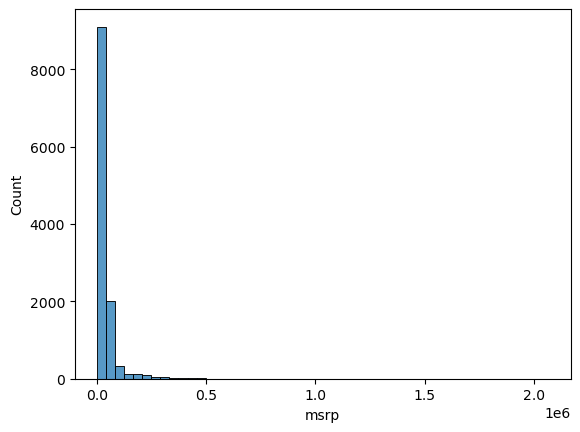

In [219]:
sns.histplot(df.msrp, bins=50)

resulting plot is a long tail distribution - very few values to the left. Long tail distributions are not
good for machine learning.

#### Zoom out by limiting the msrp to under 100,000

<Axes: xlabel='msrp', ylabel='Count'>

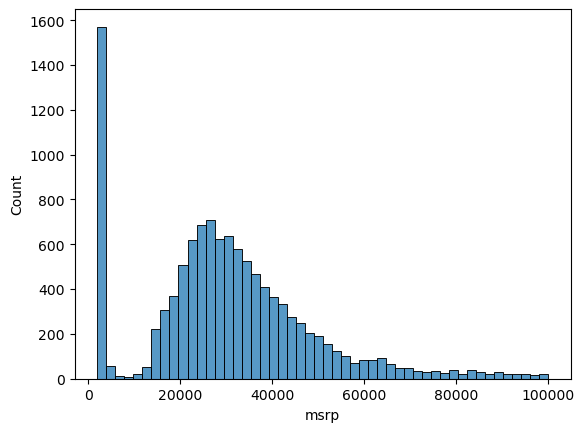

In [220]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

The resulting plot shows a large number of cars at 1,000. Possibly a default value. Long tail distributions are generally not good for machine learning. 

We need to remove the tail by using a log distribution. This distribution makes the large values smaller. Log can not be used on values of 0, so 
it is common to add one (+ 1) to all of the values. numpy.log1p

<Axes: xlabel='msrp', ylabel='Count'>

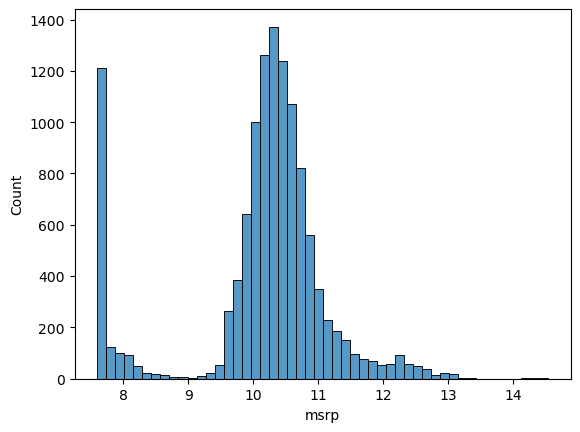

In [221]:
price_log = np.log1p(df.msrp)
sns.histplot(price_log, bins=50)

#### Missing Values

In [222]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [223]:
msrp = df.msrp.to_numpy()
msrp

array([46135, 40650, 36350, ..., 50620, 50920, 28995], shape=(11914,))

#### 2.4 Setting up the validation framework

It is an accepted practice to split the data as follows:
- 60% for training
- 20% for validation
- 20% for testing

In [224]:
n = len(df) # total number of record is data

n_val = int(n * 0.2)  # number of records in validation set
n_test = int(n * 0.2) # number of records in test set
n_train = n - n_val - n_test # number of records in training set

In [225]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

A naive approach would be to split the data as follows. The problem with the approach that the data we are using is ordered/grouped by model, make, and year. This will mean that all of a paticular make/model will be in one data set and not the others.

In [226]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

Before splitting the data, we need to randomize it so when split each data set will have some of all the make/model/year.

In [227]:
idx = np.arange(n) 

np.random.seed(2)
np.random.shuffle(idx)

# now split the data using idx
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [228]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [229]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


Note the index column (leftmost, no column name) has the values from the original data set before the split. These values are not needed so we can reset the index.

In [230]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


Transform the y (msrp) values.

In [231]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

Remove the msrp column from the sets

In [232]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear Regression

In [233]:
# One observation (xi1)
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [234]:
# Using engine_hp, city_mpg and popularity make simple observation
xi = [453, 11, 86]

In [235]:
w0 = 7.15 # bias
w = [0.01, 0.04, 0.002] # weights

In [236]:
def g(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [237]:
g(xi)

12.292

Note: We performed a log + 1 on the msrp, so our prediction needs do exponent - 1 on the result to undo.

In [238]:
np.expm1(12.292)

np.float64(217944.43232444194)

In [239]:
np.log1p(217944.43232444194)

np.float64(12.292)

## 2.6 Linear Regression vector form

In [240]:
def dot(xi, w):
    n = len(xi)

    result = 0.0

    for j in range(n):
        result = result + xi[j] * w[j]

    return result

In [241]:
def linear_regression(xi):
    return w0 + dot(xi, w)

Move the bias, w0, in the weights. 

wo*xi0 + x^tw   xi0 = 1. -> xit * w

In [242]:
w_new = [w0] + w

In [243]:
w_new

[7.15, 0.01, 0.04, 0.002]

In [244]:
def linear_regression(xi):
    xi = [1] + xi  # adding xi0
    return dot(xi, w_new)

In [245]:
linear_regression(xi) # provides same answer as g(xi) in 2.5

12.292

In [246]:
xi = [453, 11, 86]
w0 = 7.17 # bias
w = [0.01, 0.04, 0.002] # weights
w_new = [w0] + w

In [247]:
# observations
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10] # list of lists
X = np.array(X)   # convert list of lists into num py matrix
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [248]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [249]:
def linear_regression(X):
    return X.dot(w_new)

In [250]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a Linear Regression Model: Normal Equation

In [251]:
def train_linear_regression(X, y):
    pass

In [252]:
X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86], 
    [158,   24, 185],
    [172,   25, 201],
    [413,   11,   86], 
    [38,   54, 185],
    [142,   25, 431],
    [453,   31,   86],   
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [253]:
ones = np.ones(X.shape[0]) # bias column 
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [254]:
X = np.column_stack([ones, X])

In [255]:
XTX = X.T.dot(X) # gram matrix
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [256]:
XTX_inv = np.linalg.inv(XTX) # inverse XTX
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [257]:
# Dot product should give identiy matrix
XTX.dot(XTX_inv).round(1) 

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [258]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+04, -2.27742529e+01, -2.57694130e+02, -2.30120640e+00])

In [259]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(30006.77669255554),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

In [260]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # bias column 
    X = np.column_stack([ones, X])

    # normal equation
    XTX = X.T.dot(X) # gram matrix
    XTX_inv = np.linalg.inv(XTX) # inverse XTX
    w_full = XTX_inv.dot(X.T).dot(y)

    # return bias term and weights
    return w_full[0], w_full[1:]

In [261]:
# regenerate X with bias column
X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86], 
    [158,   24, 185],
    [172,   25, 201],
    [413,   11,   86], 
    [38,   54, 185],
    [142,   25, 431],
    [453,   31,   86],   
]

X = np.array(X)
X

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [262]:
train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Baseline Model for Car Price Prediction

In [263]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [264]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [265]:
# get the numeric columns with the exception of year
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [266]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [267]:
# fill nulls with 0
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [268]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [269]:
w0, w = train_linear_regression(X_train, y_train)

In [270]:
# get predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

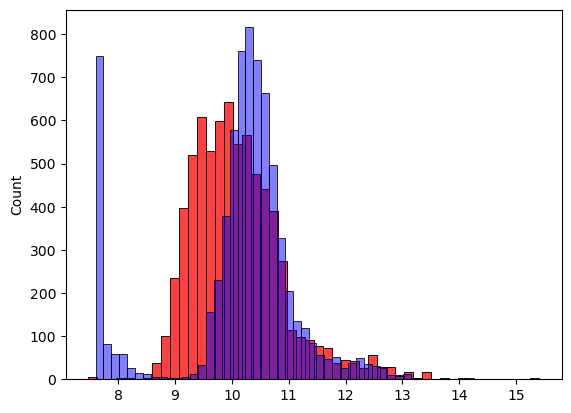

In [271]:
# check to see if predictions are close to actual
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

The model is predicting smaller values than the target.

## 2.9 Root Mean Square Error

In [272]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)


In [273]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Computing RMSE on Validation Data

In [274]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
# X_train = df_train[base].fillna(0).values
# w0, w = train_linear_regression(X_train, y_train)
# y_pred = w0 + X_train.dot(w)

In [275]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [276]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.761653099130156)

## 2.11 Simple Feature Engineering

In [277]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


Year is very important to determing the price of a vehicle. New vehicles will be priced higer than older vehichles.

In [278]:
# instead of using year, we will find the age of the vehicle
# find newest (max) year in the data
df_train.year.max()

np.int64(2017)

In [279]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [280]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 -df.year
    #df['age'] = df.year.max() - df.year
    #features = base + ['age']
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [281]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058299)

Adding age is a big improvement from 0.7554192603920132

<Axes: ylabel='Count'>

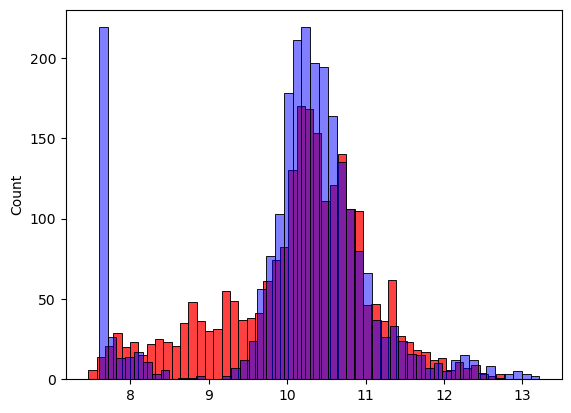

In [282]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

The shape of the distribution is closer. There are still areas on the left that can be addressed.

## 2.12 Categorical Variables

Categorical varialbes are typically strings.

In [283]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


Number of doors is not a numerical variable. 

In [284]:
# Create for new columns to binary encode the number_of_doors
for v in [2, 3, 4]:
    df_train['num_doors_%s' %v] = (df_train['number_of_doors'] == v).astype('int')  # convert bool true/false to 1/0


In [285]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1


In [286]:
makes = list(df_train.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [287]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 -df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')  # convert bool true/false to 1/0
        features.append('num_doors_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [288]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [289]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.515799564150169)

The improvement from adding number_of_doors is almost neglegible from 0.5172055461058299

In [290]:
df_train.make.nunique()

48

In [291]:
# find most popular make
df_train.make.value_counts().head()

make
chevrolet     667
ford          519
volkswagen    489
toyota        452
dodge         367
Name: count, dtype: int64

In [292]:
makes = list(df_train.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [293]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 -df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')  # convert bool true/false to 1/0
        features.append('num_doors_%s' %v)

    # encode make
    for v in makes:
        df['num_make_%s' %v] = (df.make == v).astype('int')  # convert bool true/false to 1/0
        features.append('num_make_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [294]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849556795)

Not a drastic difference (1%) as adding age, but a little better than number of doors

In [295]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [296]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
      'market_category', 'vehicle_size', 'vehicle_style'
]

In [297]:
categories = {}

# get top 5 for each category
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [298]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [299]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')  # convert bool true/false to 1/0
        features.append('num_doors_%s' %v)

    # encode categories
    for c, values in categories.items():
        for v in values:
            df['%s_%s' %(c, v)] = (df[c] == v).astype('int')  # convert bool true/false to 1/0
            features.append('%s_%s' %(c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [300]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(23.019020704791835)

Adding the categores resulted in 23.019020704791835 a significant change from 0.5076038849556795. Something is wrong

In [301]:
w0

np.float64(4011091003551887.0)

w0 is huge! w0 is the bias term. This is the value that would be predicted if there was no other information.

In [302]:
w

array([ 5.17477261e-02,  5.87434156e+00,  2.58988500e+00, -9.14739385e-01,
        3.29434090e-03,  1.26747065e+00,  1.09365186e+03,  1.08197230e+03,
        1.08519232e+03, -2.94630727e+00, -7.48076191e+00,  1.02357603e+01,
       -8.56657044e-01, -2.27736086e+00,  1.84973907e+00, -3.51656880e+00,
       -2.20958315e+00,  6.07018281e+00, -3.32427158e+01, -4.60060984e+15,
       -4.60060984e+15, -4.60060984e+15, -4.60060984e+15, -4.60060984e+15,
        5.89518839e+14,  5.89518839e+14,  5.89518839e+14,  5.89518839e+14,
       -9.26775404e-01,  3.51631589e-01,  1.80584944e-01,  1.46169331e+00,
       -1.67201746e+00, -3.59104780e+00, -6.16304692e+00, -5.45706022e+00,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

The weights are also huge!!

We added more variables in hopes to make the model better, but we only made it worse!